In [1]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded=files.upload()

Saving salary.csv to salary.csv


In [4]:
dataset=pd.read_csv('salary.csv')

In [9]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


In [13]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [18]:
X=dataset.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [19]:
Y=dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [21]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5941  252]
 [1365  583]]
Accuracy of the Model: 80.13757523645744%


# **ROC Curve** 




No Skill: ROC AUC=50.000
KNN Skill: ROC AUC=72.243


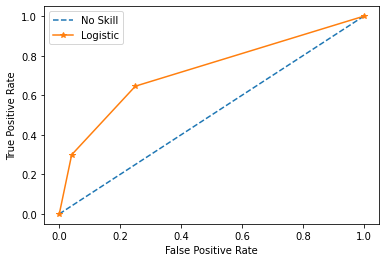

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

nsProbability = [0 for _ in range(len(y_test))]
lsProbability = model.predict_proba(X_test)
lsProbability = lsProbability[:, 1]
nsAUC = roc_auc_score(y_test, nsProbability)
knnAUC = roc_auc_score(y_test, lsProbability)
print('No Skill: ROC AUC=%.3f' % (nsAUC*100))
print('KNN Skill: ROC AUC=%.3f' % (lrAUC*100))
nsFP, nsTP, _ = roc_curve(y_test, nsProbability)
knnFP, knnTP, _ = roc_curve(y_test, lsProbability)
plt.plot(nsFP, nsTP, linestyle='--', label='No Skill')
plt.plot(knnFP, knnTP, marker='*', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=100)
result = cross_val_score(model, X, Y, cv=kfold)
print("CROSS VALIDATION SCORE: %.2f%%" % (result.mean()*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CROSS VALIDATION SCORE: 75.63%


In [36]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = KNeighborsClassifier()
results_skfold = cross_val_score(model_skfold, X, Y, cv=skfold)
print("STRATIFIELD K-FOLD SCORE: %.2f%%" % (results_skfold.mean()*100.0))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


STRATIFIELD K-FOLD SCORE: 77.35%


8141
1948


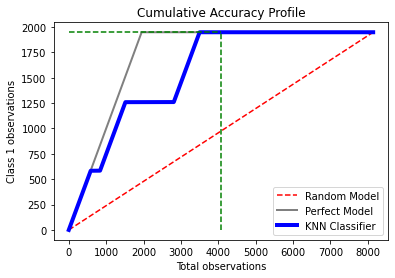

In [37]:
total = len(y_test)
print(total)
class_1_count = np.sum(y_test)
print(class_1_count)
class_0_count = total - class_1_count
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth = 2, 
         label = 'Perfect Model')

probs = model.predict_proba(X_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values, 
         y_values, 
         c = 'b', 
         label = 'KNN Classifier', 
         linewidth = 4)

index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
plt.xlabel('Total observations')
plt.ylabel('Class 1 observations')
plt.title('Cumulative Accuracy Profile')
plt.legend(loc = 'lower right')